<a href="https://colab.research.google.com/github/ANKIT-KUMAR-J/customer-churn-data/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
from google.colab import files
uploaded = files.upload()



Saving Customer Churn.csv to Customer Churn.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV (file name must match uploaded file name exactly)
df = pd.read_csv('Customer Churn.csv')
df.columns = df.columns.str.strip()  # remove spaces from column names


In [3]:
print(df.head())
print(df.info())

# Clean TotalCharges column
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

# Check nulls and structure
print(df.info())
print(df.isnull().sum().sum())
print(df.describe())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
print(df.duplicated().sum())
print(df["customerID"].duplicated().sum())

# Convert SeniorCitizen from 0/1 to "yes"/"no"
def conv(value):
    return "yes" if value == 1 else "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)
print(df.head())


0
0
   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            no     Yes         No       1           No   
1  5575-GNVDE    Male            no      No         No      34          Yes   
2  3668-QPYBK    Male            no      No         No       2          Yes   
3  7795-CFOCW    Male            no      No         No      45           No   
4  9237-HQITU  Female            no      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Paperl

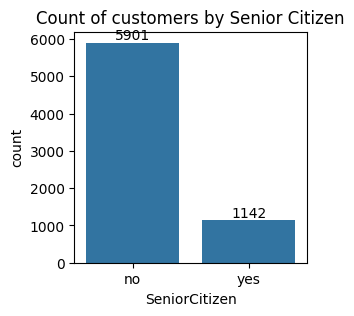

In [5]:
plt.figure(figsize = (3,3))
ax = sns.countplot(x='SeniorCitizen', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Senior Citizen")
plt.show()


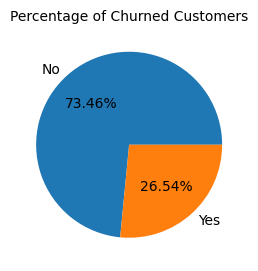

In [6]:
plt.figure(figsize=(3, 4))
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()


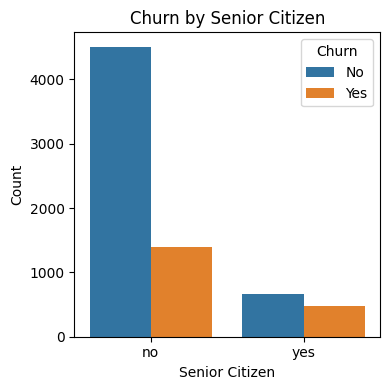

In [7]:
plt.figure(figsize=(4, 4))
sns.countplot(x="SeniorCitizen", data=df, hue="Churn")
plt.title("Churn by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


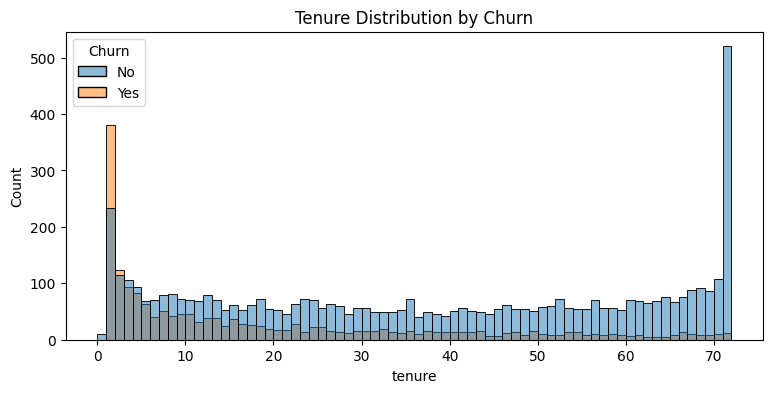

In [8]:
plt.figure(figsize=(9, 4))
sns.histplot(x="tenure", data=df, bins=72, hue="Churn")
plt.title("Tenure Distribution by Churn")
plt.show()


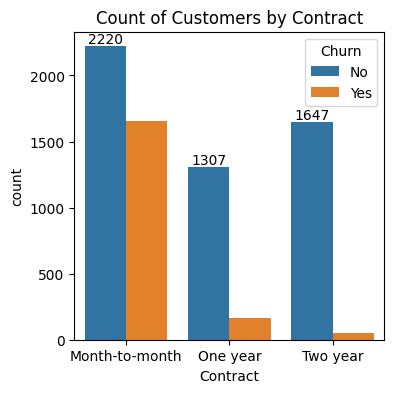

In [9]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()


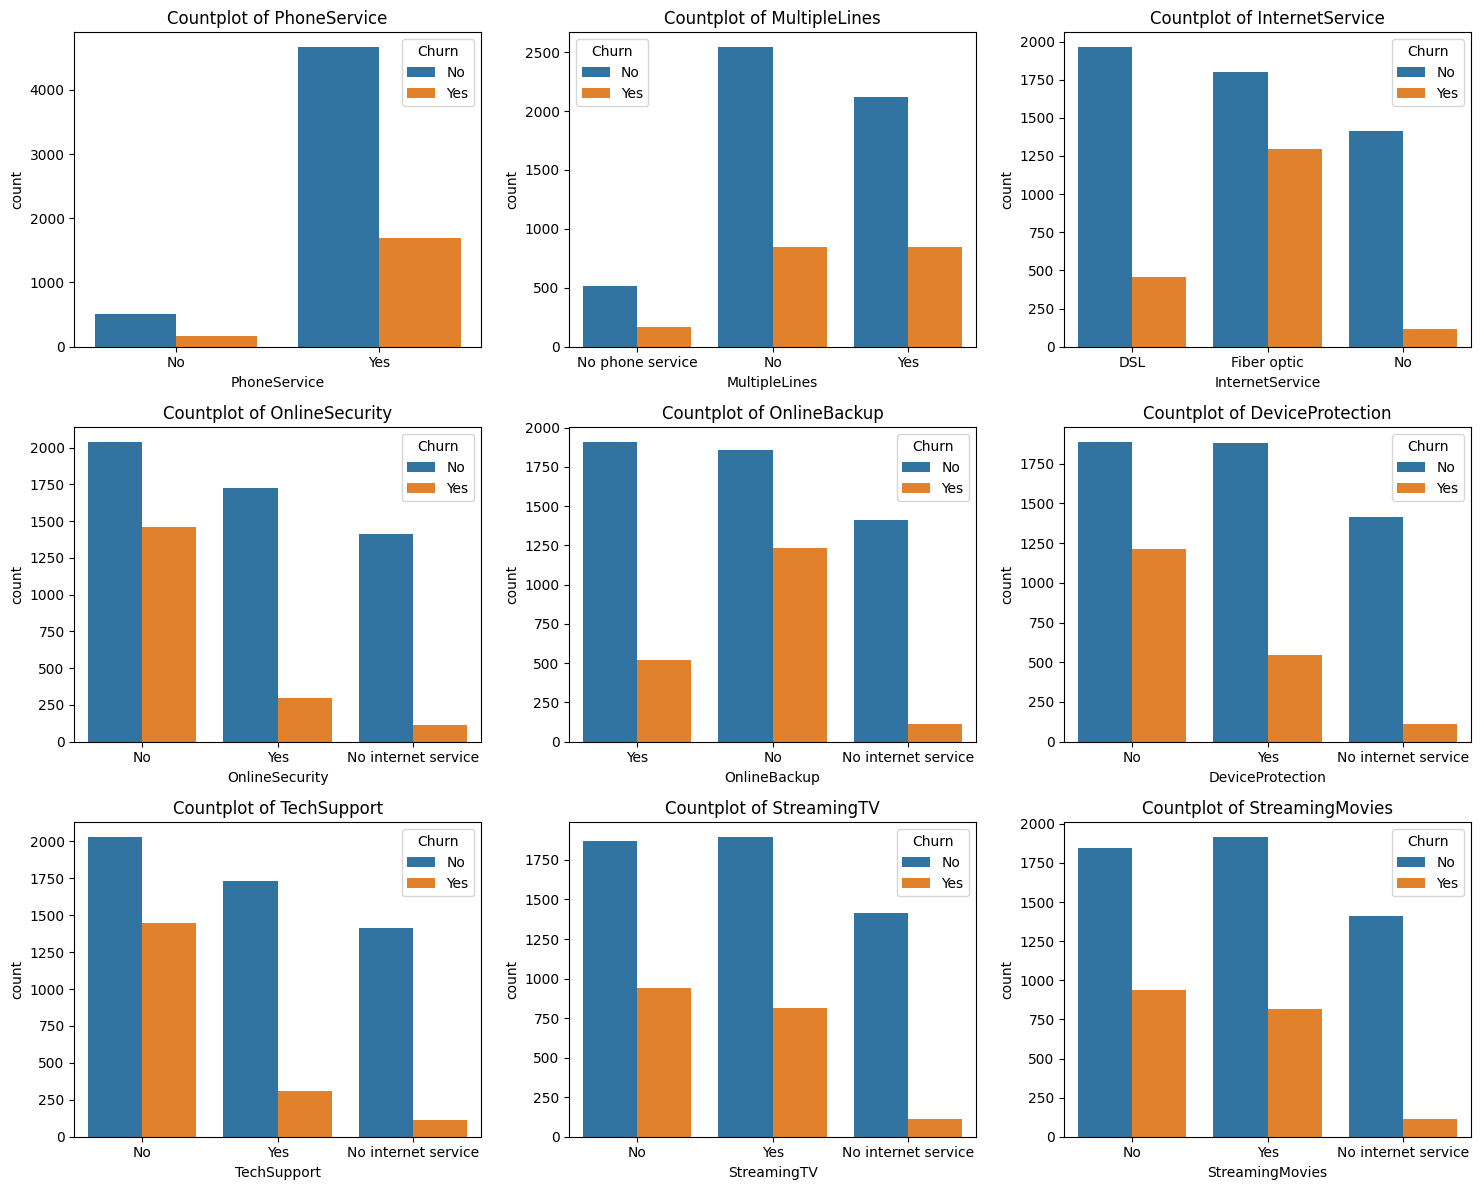

In [10]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    if col in df.columns:
        sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"])
        axes[i].set_title(f'Countplot of {col}')
        axes[i].tick_params(axis='x', rotation=0)
    else:
        axes[i].text(0.5, 0.5, f"Column '{col}' not found", ha='center', va='center')
        axes[i].set_axis_off()

plt.tight_layout()
plt.show()


The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.


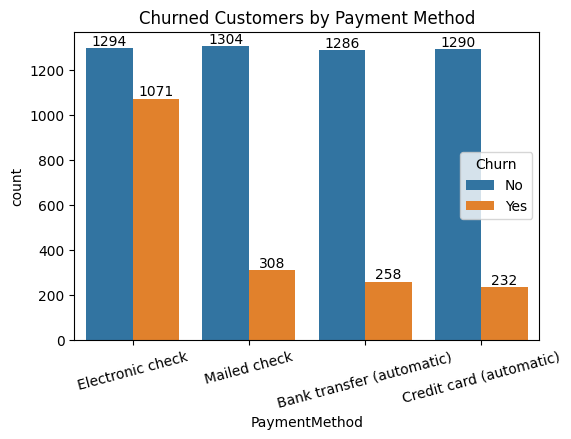

In [11]:
print("The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.")

plt.figure(figsize=(6, 4))
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation=15)
plt.show()
